## Clasificación de tipos de ropa

Completa el notebook y logra un error de validación ≤ 𝟎. 𝟑 (alrededor del 89% de exactitud)

### Importar librerías

In [8]:
%%time
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Sequential
from keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense, Flatten, Dropout,ActivityRegularization
from keras import regularizers

from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report

CPU times: user 1.9 s, sys: 3.94 s, total: 5.84 s
Wall time: 2.07 s


In [2676]:
tf.config.list_physical_devices("GPU")

[]

### Descargar el conjunto de datos

In [2677]:
fmnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fmnist.load_data()

### Exploración de los datos


In [2678]:
# Tamaño del conjunto de datos de entrenamiento
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [2679]:
# Tamaño del conjunto de datos de prueba
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [2680]:
print('Valor mínimo: ', x_train.min())
print('Valor máximo: ', x_train.max())

Valor mínimo:  0
Valor máximo:  255


In [2681]:
# Reescalar las imágenes. Deben estar en un rango de [0-1]
x_train = x_train/255.0
x_test = x_test/255.0

In [2682]:
print('Valor mínimo: ', x_train.min())
print('Valor máximo: ', x_train.max())

Valor mínimo:  0.0
Valor máximo:  1.0


In [2683]:
def visualize_dataset(n,x,y):
    plt.figure(figsize=(10,10))
    for i in range(n*n):
        plt.subplot(n,n,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x[i], cmap=plt.get_cmap('gray'))
        plt.xlabel(y[i])
    plt.show()

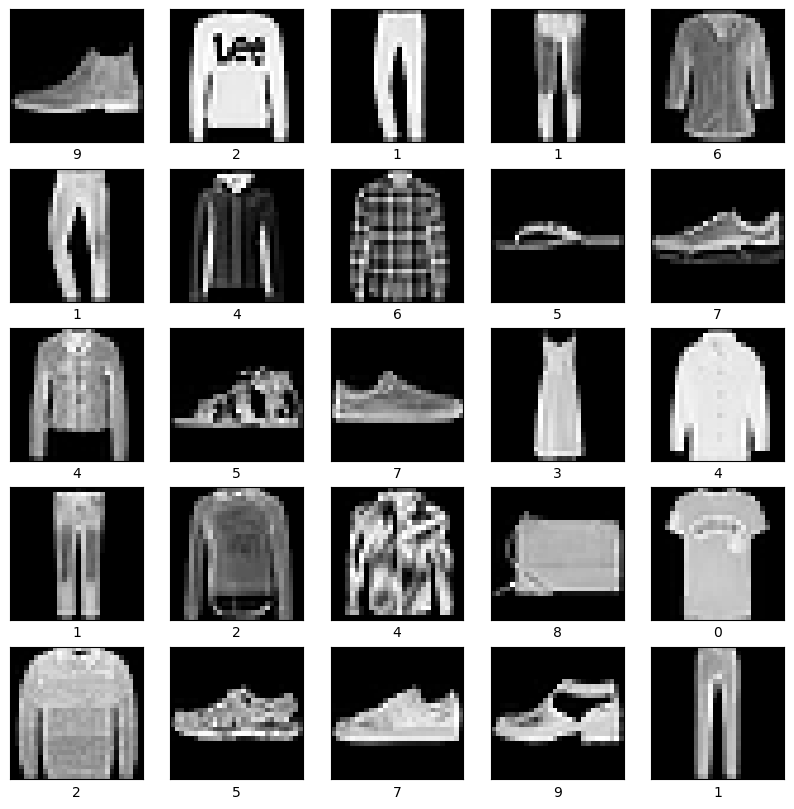

In [2684]:
visualize_dataset(5,x_test,y_test)

In [2685]:
def visualize_labels(y,visualize=False):
    unique, counts = np.unique(y, return_counts=True) # Encuentra los elementos únicos de un array
    print('Clases: ', unique)
    print('Número de instancias por clase', counts)

    if visualize == True:
        plt.figure(figsize=(11,5))
        plt.bar(unique,counts, color = (0.3,0.1,0.4,0.6))
        plt.xlabel('Clases')
        plt.ylabel('Frecuencia')
        plt.xticks(unique)

        for i, v in enumerate(counts):
            plt.text(i-0.25, v+10, str(v), color = 'blue')
        plt.show()

Clases:  [0 1 2 3 4 5 6 7 8 9]
Número de instancias por clase [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


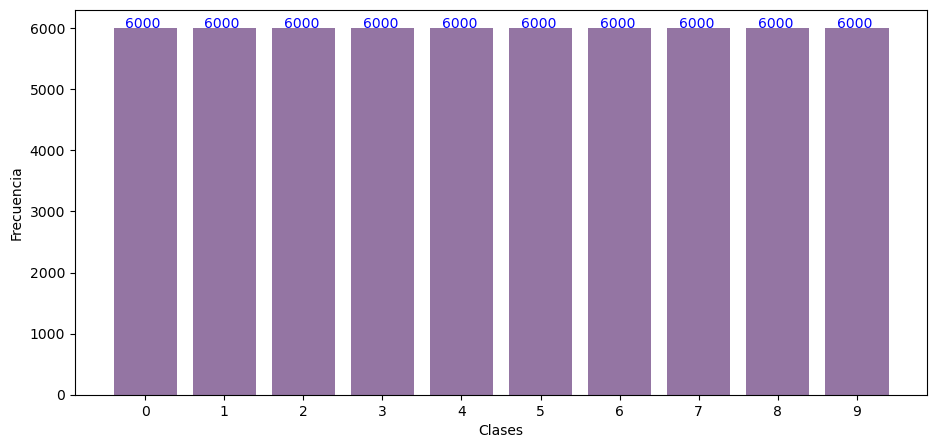

In [2686]:
visualize_labels(y_train, True)

### Definición del modelo

In [11]:
# Define tu modelo
act_func = 'sigmoid'
n_nueronas= 512

model = Sequential()
model.add(Flatten(input_shape=(28,28)))

model.add(Dropout(0.3,seed=1))
model.add(Dense(n_nueronas, activation=act_func))

model.add(Dropout(0.4,seed=2))
model.add(Dense(n_nueronas, activation=act_func))

model.add(Dropout(0.5,seed=3))
model.add(Dense(n_nueronas, activation=act_func))

model.add(Dense(10, activation='softmax'))

/opt/homebrew/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
cat_foc_cross_emtr = keras.losses.SparseCategoricalCrossentropy(
    from_logits=False,
    ignore_class=None,
    reduction="sum_over_batch_size",
    name="sparse_categorical_crossentropy",
    dtype=None,
)

In [13]:
#Compilar el modelo
model.compile(optimizer="adamax",loss=cat_foc_cross_emtr  ,metrics=["accuracy"])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 932,362 (3.56 MB)

 Trainable params: 932,362 (3.56 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
#plot_model(model, show_shapes=True)


### Entrenamiento del modelo


In [2692]:
es = EarlyStopping(monitor='val_loss', patience=50,  mode='min',  verbose=0, min_delta=0.0001)
checkpoint = keras.callbacks.ModelCheckpoint("best_model_FashionMnist.keras", monitor="val_loss", verbose=0, save_best_only=True, mode='min')

In [2693]:
%%time
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),callbacks=[es,checkpoint] , batch_size=4096,epochs=10000,verbose=1, shuffle=True)

Epoch 1/10000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1250 - loss: 2.3532 - val_accuracy: 0.4389 - val_loss: 2.1013
Epoch 2/10000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3671 - loss: 2.0243 - val_accuracy: 0.5050 - val_loss: 1.5754
Epoch 3/10000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4765 - loss: 1.5271 - val_accuracy: 0.5579 - val_loss: 1.2245
Epoch 4/10000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5621 - loss: 1.2179 - val_accuracy: 0.6117 - val_loss: 1.0405
Epoch 5/10000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6073 - loss: 1.0549 - val_accuracy: 0.6510 - val_loss: 0.9242
Epoch 6/10000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6461 - loss: 0.9504 - val_accuracy: 0.6797 - val_loss: 0.8400
Epoch 7/10000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6731 - loss: 0.8726 - val_accuracy: 0.7155 - val_loss: 0.7744
Epoch 8/10000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6969 - loss: 0.8112 - 

### Evaluación del modelo

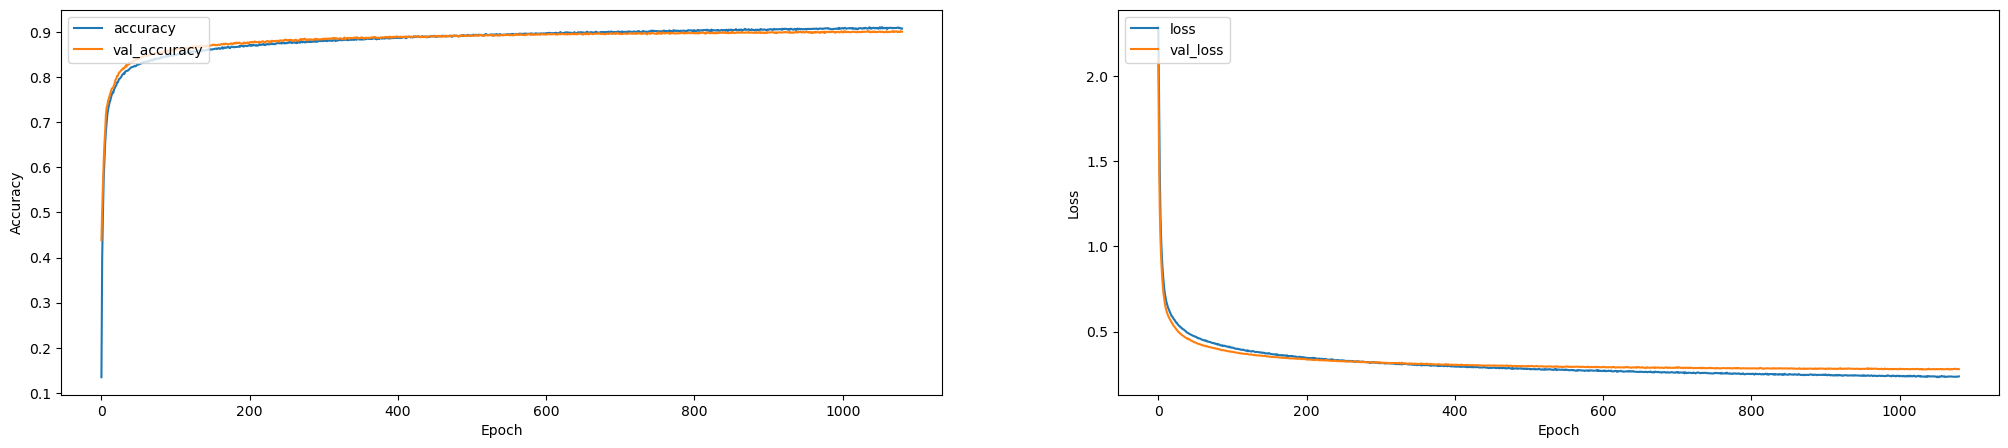

In [2694]:
fig, axs = plt.subplots(1, 2,figsize=(25, 5))
axs[0].plot(history.history['accuracy'], label='accuracy')
axs[0].plot(history.history['val_accuracy'], label = 'val_accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
#axs[0].set_ylim([0.89,0.92])
axs[0].legend(loc='upper left')

axs[1].plot(history.history['loss'], label='loss')
axs[1].plot(history.history['val_loss'], label = 'val_loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
#axs[1].set_ylim([0.31, 0.37])
axs[1].legend(loc='upper left')
plt.show()

In [2695]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.8986 - loss: 0.2809
Test accuracy: 0.9010
Test loss: 0.2791


Evaluación del mejor modelo

In [2696]:
from tensorflow.keras.models import load_model

In [2697]:

nn = load_model('best_model_FashionMnist.keras')

In [2698]:
test_loss, test_acc = nn.evaluate(x_test, y_test)
print(f'train accuracy: {test_acc:.3f}')
print(f'Test loss: {test_loss:.3f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8990 - loss: 0.2794
train accuracy: 0.900
Test loss: 0.277


In [2699]:
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step


Matriz de confusión

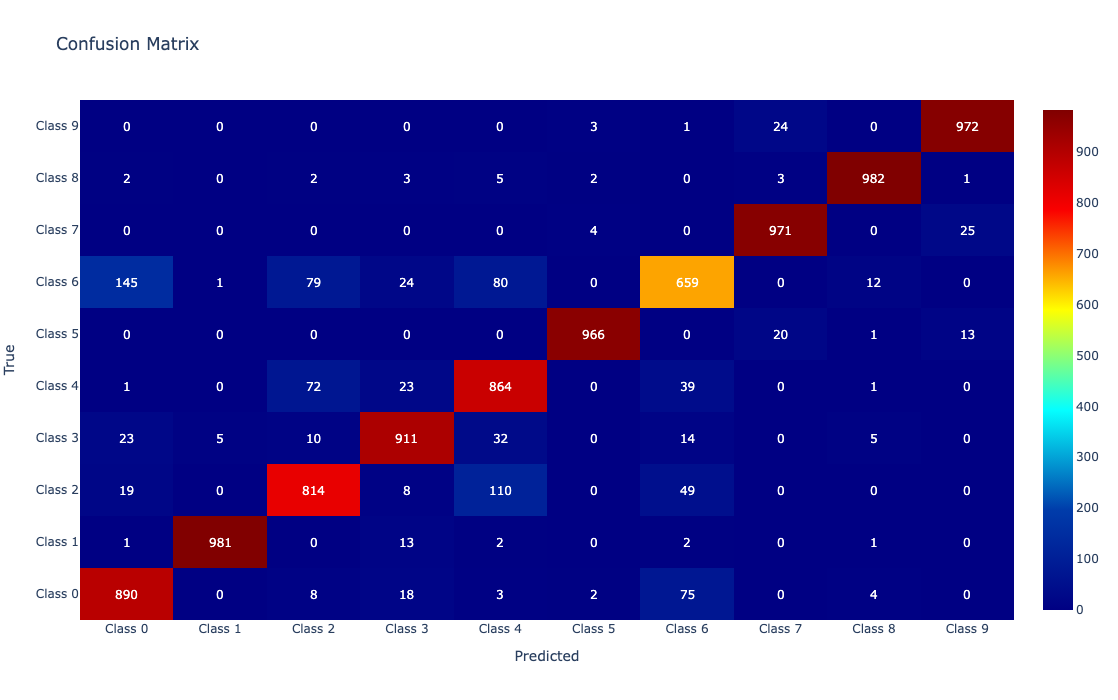

In [2700]:
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix

# Suponiendo que ya tienes y_test y y_pred definidos
cf_matrix = confusion_matrix(y_test, y_pred)

# Etiquetas de las clases (puedes personalizarlas según corresponda)
class_labels = [f'Class {i}' for i in range(10)]

# Crear el heatmap usando Plotly
heatmap = go.Figure(data=go.Heatmap(
    z=cf_matrix,
    x=class_labels,   # Etiquetas en el eje X
    y=class_labels,   # Etiquetas en el eje Y
    hoverongaps=True,
    colorscale='Jet',  # Puedes cambiar el esquema de color si lo prefieres
    showscale=True       # Mostrar la escala de colores
))

# Añadir anotaciones a cada celda con el valor de la matriz de confusión
annotations = []
for i in range(cf_matrix.shape[0]):
    for j in range(cf_matrix.shape[1]):
        annotations.append(
            dict(
                x=j,
                y=i,
                text=str(cf_matrix[i, j]),
                showarrow=False,
                font=dict(color='white', size=12)  # Ajusta el tamaño de fuente según sea necesario
            )
        )

# Actualizar la disposición para incluir las anotaciones
heatmap.update_layout(
    title="Confusion Matrix",
    xaxis_title="Predicted",
    yaxis_title="True",
    annotations=annotations,
    xaxis=dict(tickmode='array', tickvals=list(range(10)), ticktext=class_labels),
    yaxis=dict(tickmode='array', tickvals=list(range(10)), ticktext=class_labels),
    width=700, height=700
)

# Mostrar el gráfico interactivo
heatmap.show()


In [2701]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.83      0.81      0.82      1000
           3       0.91      0.91      0.91      1000
           4       0.79      0.86      0.82      1000
           5       0.99      0.97      0.98      1000
           6       0.79      0.66      0.72      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [2702]:
def plot_prediction(index):
    print('Valor real: ',y_test[index] )
    print('Predicción: ',y_pred[index])
    plt.figure(figsize=(6,3))
    plt.imshow(x_test[index], cmap='gray')
    plt.axis('off')
    plt.show()

Valor real:  1
Predicción:  1


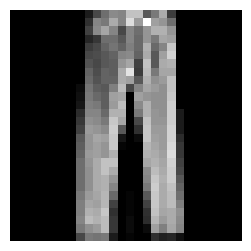

In [2703]:
i = np.random.randint(0, len(y_test) )
plot_prediction(i)